In [43]:
# Google Colaboratoryを使用する場合は、下記のコメントアウトを外し、実行してください

In [44]:
# # 下記セルを実行すると、authorization codeの入力を求められます。
# # 出力されたリンク先をクリックし、Googleアカウントにログインし、
# # authorization codeをコピーし、貼り付けをおこなってください。
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
# working_dir = 'MLSys_100Knocks' #　※※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
# path = f'/content/drive/MyDrive/{working_dir}/本章/10章'
# os.chdir(path)
# ! pip install japanize-matplotlib

# １０章_機械学習システムのダッシュボードを作成する１０本ノック



### ノック９１：単一データの読み込みをしよう

In [46]:
import os
import pandas as pd
data_dir = "data"
store_monthly_dir = os.path.join(data_dir, "01_store_monthly")
ml_base_dir = os.path.join(data_dir, "02_ml_base")

output_ml_result_dir = os.path.join(data_dir, "10_output_ml_result")
output_report_dir = os.path.join(data_dir, "11_output_report")

store_monthly_file = "store_monthly_data.csv"
ml_base_file = "ml_base_data.csv"

store_monthly_data = pd.read_csv(os.path.join(store_monthly_dir, store_monthly_file))
ml_base_data = pd.read_csv(os.path.join(ml_base_dir, ml_base_file))
display(store_monthly_data.head(3))
display(ml_base_data.head(3))

,store_name,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,order_time_11,order_time_12,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,あきる野店,1147,945,202,841,306,844,303,91,122,...,101,95,107,106,100,108,109,96,34.110053,201904
1,さいたま南店,1504,1217,287,1105,399,1104,400,130,135,...,143,142,137,130,113,140,132,155,35.337716,201904
2,さいたま緑店,1028,847,181,756,272,756,272,95,91,...,95,102,82,90,93,95,95,84,34.291617,201904


,store_name,y_weekday,y_weekend,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,あきる野店,1.0,0.0,1147,945,202,841,306,844,303,...,101,95,107,106,100,108,109,96,34.110053,201904
1,さいたま南店,1.0,1.0,1504,1217,287,1105,399,1104,400,...,143,142,137,130,113,140,132,155,35.337716,201904
2,さいたま緑店,1.0,1.0,1028,847,181,756,272,756,272,...,95,102,82,90,93,95,95,84,34.291617,201904


### ノック９２：機械学習モデルの精度評価結果を読み込んで結合しよう

In [47]:
ml_results_dirs = os.listdir(output_ml_result_dir)
score_all = []
for ml_results_dir in ml_results_dirs:
    score_file_path = os.path.join(output_ml_result_dir, ml_results_dir, "score.csv")
    score_monthly = pd.read_csv(score_file_path)
    score_monthly["dirs"] = ml_results_dir
    score_all.append(score_monthly)

score_all = pd.concat(score_all, ignore_index=True)
score_all.head()


,DataCategory,acc,f1,recall,precision,tp,fn,fp,tn,model_name,model_target,dirs
0,train,1.000000,1.000000,1.000000,1.000000,861,0,0,777,tree,y_weekday,results_202004
1,test,0.811966,0.829016,0.818414,0.839895,320,71,61,250,tree,y_weekday,results_202004
2,train,1.000000,1.000000,1.000000,1.000000,861,0,0,777,RandomForest,y_weekday,results_202004
3,test,0.792023,0.816121,0.828645,0.803970,324,67,79,232,RandomForest,y_weekday,results_202004
4,train,0.865079,0.875212,0.900116,0.851648,775,86,135,642,GradientBoosting,y_weekday,results_202004


In [48]:
score_all.loc[:, "year_month"] = score_all["dirs"].str.split("_", expand=True)[1]
score_all.head()

,DataCategory,acc,f1,recall,precision,tp,fn,fp,tn,model_name,model_target,dirs,year_month
0,train,1.000000,1.000000,1.000000,1.000000,861,0,0,777,tree,y_weekday,results_202004,202004
1,test,0.811966,0.829016,0.818414,0.839895,320,71,61,250,tree,y_weekday,results_202004,202004
2,train,1.000000,1.000000,1.000000,1.000000,861,0,0,777,RandomForest,y_weekday,results_202004,202004
3,test,0.792023,0.816121,0.828645,0.803970,324,67,79,232,RandomForest,y_weekday,results_202004,202004
4,train,0.865079,0.875212,0.900116,0.851648,775,86,135,642,GradientBoosting,y_weekday,results_202004,202004


### ノック９３：機械学習モデルの重要変数データを読み込んで結合しよう

In [49]:
ml_results_dirs = os.listdir(output_ml_result_dir)
importance_all = []
for ml_results_dir in ml_results_dirs:
    importance_file_path = os.path.join(output_ml_result_dir, ml_results_dir, "importance.csv")
    importance_monthly = pd.read_csv(importance_file_path)
    importance_monthly["dirs"] = ml_results_dir
    importance_all.append(importance_monthly)

importance_all = pd.concat(importance_all, ignore_index=True)
importance_all.loc[:, "year_month"] = importance_all["dirs"].str.split("_", expand=True)[1]
importance_all.head()

,cols,importance,model_name,model_target,dirs,year_month
0,order_weekend,0.349060,tree,y_weekday,results_202004,202004
1,order_weekday,0.276106,tree,y_weekday,results_202004,202004
2,order,0.050472,tree,y_weekday,results_202004,202004
3,order_takeout,0.034702,tree,y_weekday,results_202004,202004
4,delta_avg,0.030703,tree,y_weekday,results_202004,202004


### ノック９４：機械学習モデルの予測結果を読み込んで結合しよう

In [50]:
report_files = os.listdir(output_report_dir)
report_all = []
for report_file in report_files:
    report_file_path = os.path.join(output_report_dir, report_file)
    report_monthly = pd.read_excel(report_file_path)
    report_monthly = report_monthly[["store_name", "score_weekday", "score_weekend"]].copy()
    report_monthly["files"] = report_file
    report_all.append(report_monthly)

report_all = pd.concat(report_all, ignore_index=True)
report_all.head()

,store_name,score_weekday,score_weekend,files
0,あきる野店,0.934175,0.189950,report_pred_202009.xlsx
1,さいたま南店,0.923585,0.130423,report_pred_202009.xlsx
2,さいたま緑店,0.915487,0.192131,report_pred_202009.xlsx
3,さいたま西店,0.922653,0.142393,report_pred_202009.xlsx
4,つくば店,0.961495,0.122807,report_pred_202009.xlsx


In [51]:
report_all.loc[:, "pred_year_month"] = report_all["files"].str.split(".", expand=True)[0]
report_all.loc[:, "pred_year_month"] = report_all["pred_year_month"].str[12:]
report_all.head()

,store_name,score_weekday,score_weekend,files,pred_year_month
0,あきる野店,0.934175,0.189950,report_pred_202009.xlsx,202009
1,さいたま南店,0.923585,0.130423,report_pred_202009.xlsx,202009
2,さいたま緑店,0.915487,0.192131,report_pred_202009.xlsx,202009
3,さいたま西店,0.922653,0.142393,report_pred_202009.xlsx,202009
4,つくば店,0.961495,0.122807,report_pred_202009.xlsx,202009


### ノック９５：機械学習モデルの予測結果を検証するためのデータを作成しよう

In [52]:
ml_data = ml_base_data[["store_name", "y_weekday", "y_weekend", "year_month"]].copy()
ml_data.loc[:, "pred_year_month"] = pd.to_datetime(ml_data["year_month"], format="%Y%m")
from dateutil.relativedelta import relativedelta
ml_data.loc[:, "pred_year_month"] = ml_data["pred_year_month"].map(lambda x: x + relativedelta(months=1))
ml_data.loc[:, "pred_year_month"] = ml_data["pred_year_month"].dt.strftime("%Y%m")
del ml_data["year_month"]
ml_data.head(3)

/tmp/ipykernel_3719/187066233.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ml_data.loc[:, "pred_year_month"] = ml_data["pred_year_month"].map(lambda x: x + relativedelta(months=1))


,store_name,y_weekday,y_weekend,pred_year_month
0,あきる野店,1.0,0.0,201905
1,さいたま南店,1.0,1.0,201905
2,さいたま緑店,1.0,1.0,201905


In [53]:
report_valid = pd.merge(report_all, ml_data, on=["store_name", "pred_year_month"], how="left")
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
0,あきる野店,0.934175,0.189950,report_pred_202009.xlsx,202009,NaN,NaN
1,さいたま南店,0.923585,0.130423,report_pred_202009.xlsx,202009,NaN,NaN
2,さいたま緑店,0.915487,0.192131,report_pred_202009.xlsx,202009,NaN,NaN
3,さいたま西店,0.922653,0.142393,report_pred_202009.xlsx,202009,NaN,NaN
4,つくば店,0.961495,0.122807,report_pred_202009.xlsx,202009,NaN,NaN
...,...,...,...,...,...,...,...
970,高津店,0.957555,0.140530,report_pred_202006.xlsx,202006,1.0,0.0
971,高田馬場店,0.968534,0.163092,report_pred_202006.xlsx,202006,1.0,0.0
972,鴻巣店,0.966021,0.175246,report_pred_202006.xlsx,202006,1.0,0.0
973,鶴見店,0.932150,0.149506,report_pred_202006.xlsx,202006,1.0,0.0


In [54]:
report_valid.dropna(inplace=True)
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
195,あきる野店,0.567821,0.847881,report_pred_202005.xlsx,202005,0.0,1.0
196,さいたま南店,0.099261,0.775349,report_pred_202005.xlsx,202005,0.0,1.0
197,さいたま緑店,0.351067,0.898108,report_pred_202005.xlsx,202005,0.0,1.0
198,さいたま西店,0.256878,0.777520,report_pred_202005.xlsx,202005,0.0,1.0
199,つくば店,0.158105,0.792846,report_pred_202005.xlsx,202005,0.0,1.0
...,...,...,...,...,...,...,...
970,高津店,0.957555,0.140530,report_pred_202006.xlsx,202006,1.0,0.0
971,高田馬場店,0.968534,0.163092,report_pred_202006.xlsx,202006,1.0,0.0
972,鴻巣店,0.966021,0.175246,report_pred_202006.xlsx,202006,1.0,0.0
973,鶴見店,0.932150,0.149506,report_pred_202006.xlsx,202006,1.0,0.0


### ノック９６：店舗分析用ダッシュボードを作成しよう

SelectMultiple(index=(0,), options=('あきる野店', 'さいたま南店', 'さいたま緑店', 'さいたま西店', 'つくば店', '三浦店', '三鷹店', '上尾店', '上野店',…

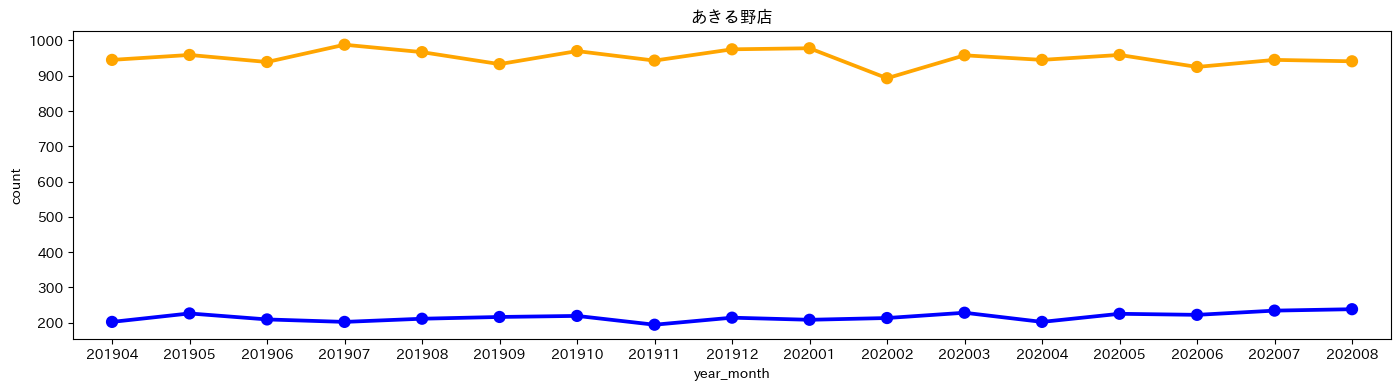

In [56]:
import seaborn as sns
from IPython.display import display, clear_output
from ipywidgets import Select, SelectMultiple
import matplotlib.pyplot as plt
import japanize_matplotlib

store_list = store_monthly_data["store_name"].unique()

def make_graph_96(val):
    clear_output()
    display(select_96)

    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    for i, trg in enumerate(val["new"]):
        pick_data = store_monthly_data.loc[store_monthly_data["store_name"]==trg]
        graph_fin = pick_data[["store_name", "order_fin", "year_month"]].copy()
        graph_fin.loc[:, "type"] = "fin"
        graph_fin = graph_fin.rename(columns={"order_fin": "count"})

        graph_cancel = pick_data[["store_name", "order_cancel", "year_month"]].copy()
        graph_cancel.loc[:, "type"] = "cancel"
        graph_cancel = graph_cancel.rename(columns={"order_cancel": "count"})

        ax = fig.add_subplot(1, len(val["new"]), (i+1))
        sns.pointplot(x="year_month", y="count", data=graph_fin, color="orange")
        sns.pointplot(x="year_month", y="count", data=graph_cancel, color="blue")
        ax.set_title(trg)

select_96 = SelectMultiple(options=store_list)
select_96.observe(make_graph_96, names="value")
display(select_96)

### ノック９７：機械学習モデルの精度評価ダッシュボードを作成しよう

### ノック９８：機械学習モデルの混同行列ダッシュボードを作成しよう

### ノック９９：機械学習モデルの変数重要度の分析ダッシュボードを作成しよう

### ノック１００：機械学習モデルの予測結果検証のための可視化をしよう